# NYGourmet Order Data Analysis

### Context

The number of restaurants in New York is increasing daily, catering to the demands of students and professionals with busy lifestyles.  Online food delivery services have emerged as a convenient option, offering access to quality food from a variety of restaurants. NYGourmet, a leading food aggregator company, streamlines this process by providing a single smartphone app that connects users to multiple restaurants.

The app enables restaurants to directly receive online orders from customers. Upon confirmation by the restaurant, the app assigns a delivery person to pick up the order. The delivery person utilizes navigation to reach the restaurant, where they await the food package. After receiving the package, the delivery person confirms pick-up in the app and proceeds to the customer's location for delivery. Upon completion, the delivery person confirms the drop-off in the app. Customers have the option to rate their orders within the app. The food aggregator earns revenue by collecting a fixed margin from the delivery orders of participating restaurants.

### Objective

The food aggregator company has collected data on orders placed by registered customers on their online platform. They aim to analyze this data to gain insights into the demand for different restaurants, ultimately enhancing the customer experience. As a Data Scientist hired by the company, you are tasked with analyzing the data and addressing key questions posed by the Data Science team. Your analysis will provide valuable insights to help improve business operations.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing the required libraries

In [ ]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Understanding the structure of the data

In [ ]:
# Reading the data
df = pd.read_csv('/content/drive/MyDrive/Week 2/foodhub_order.csv')

In [ ]:
# Displaying the first five rows of the data
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns and each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Displaying the shape of the data
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset?

In [ ]:
# Displaying data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

* There are no missing values as the non-null count for each column matches the entries range.
* There are 5 numerical variables and 4 non-numerical variables.
* The rating column is stored as an object, even though it includes numerical ratings that could be compared.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
# Displaying missing values total
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

There are no missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Generating descriptive statistics for the numerical columns in the DataFrame
df.describe ()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

On average, food preparation takes 27 minutes from the time an order is placed, with a range of 20 to 35 minutes.

### **Question 5:** How many orders are not rated?

In [ ]:
# Calculating the number of non-rated orders
non_rated_orders = (df ['rating'] == 'Not given').sum()

# Displaying the number of non-rated orders
print ('There are', non_rated_orders, 'orders that are not rated.')

There are 736 orders that are not rated.


#### Observations:

A total of 736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for variable exploration.)

Order ID

In [ ]:
# Checking unique order ID
orders_total = df['order_id'].nunique()

# Displaying the number of order IDs
print ('There are', orders_total, 'orders.')

There are 1898 orders.


Customer ID

In [ ]:
# Checking unique customer ID
customer_ID_total = df['customer_id'].nunique()

# Displaying the number of customer IDs
print ('There are', customer_ID_total, 'customer IDs.')

There are 1200 customer IDs.


Restaurant Name

In [ ]:
# Checking unique restaurant name
restaurant_name_total = df['restaurant_name'].nunique()

# Displaying the number of restaurant names
print ('There are', restaurant_name_total, 'restaurant names.')

There are 178 restaurant names.


Cuisine type

In [ ]:
# Checking unique cuisine type
cuisine_type_total = df['cuisine_type'].nunique()

# Displaying the number of cuisine types
print ('There are', cuisine_type_total, 'cuisine types.')

There are 14 cuisine types.


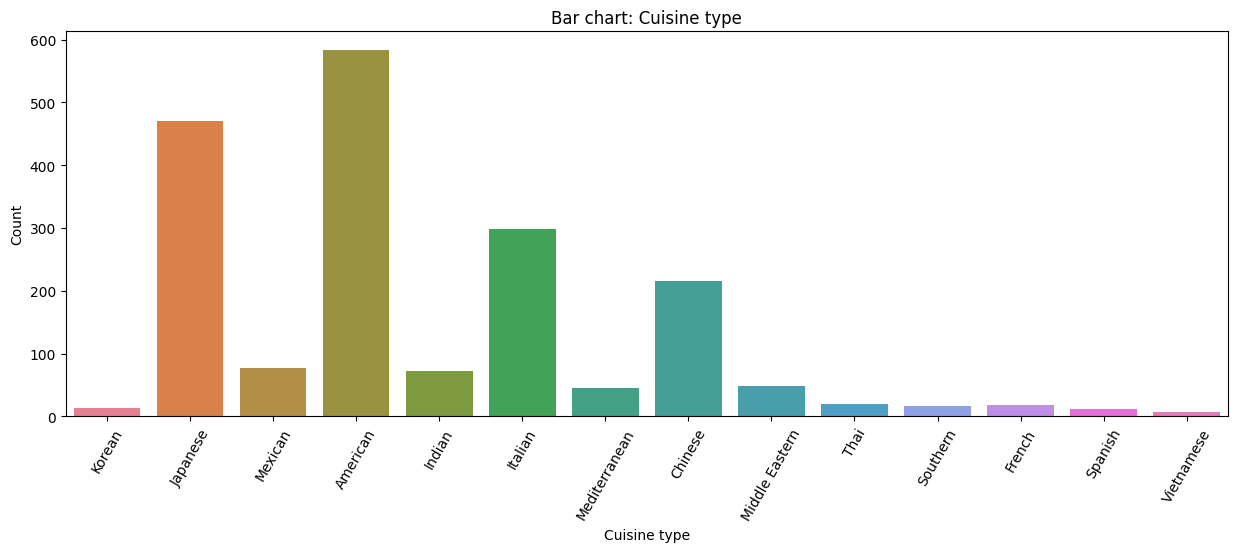

In [ ]:
# Creating a countplot for cuisine type
plt.figure(figsize=(15, 5))
plt.xticks(rotation=60)
plt.title('Bar chart: Cuisine type')
sns.countplot(data=df, x='cuisine_type', hue='cuisine_type', legend=False)
plt.xlabel('Cuisine type')
plt.ylabel('Count')
plt.show()

Observations:

American cuisine is the most frequent, while Vietnamese cuisine is the least frequent. Japanese, Italian, and Chinese cuisines are also highly frequent.

Cost of the order

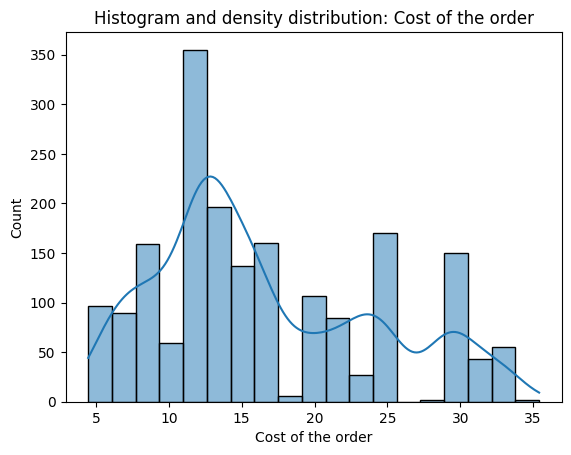

In [ ]:
# Creating histogram and density distribution for cost of the order
plt.title ('Histogram and density distribution: Cost of the order')
plt.xlabel ('Cost of the order')
sns.histplot (data=df, x='cost_of_the_order', kde=True);

Observations:

The cost of the order data is right-skewed and has a multimodal shape.

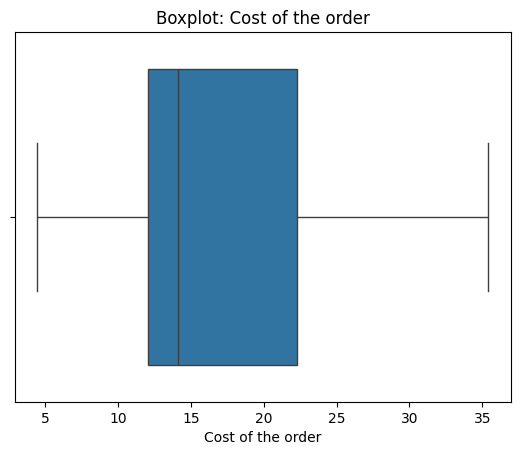

In [ ]:
# Creating boxplot for the cost of order
plt.title ('Boxplot: Cost of the order')
sns.boxplot (data=df, x='cost_of_the_order')
plt.xlabel ('Cost of the order');

Observations:

The cost of the order data is right-skewed. It has a relatively wide range from a minimum of 5 dollars to a maximum of 35 dollars. The median for cost of the order is 14 dollars.

Day of the week

In [ ]:
# Checking the unique values for the 'day_of_the_week' column
day_of_week_total = df['day_of_the_week'].nunique ()

# Displaying the total values for the 'day_of_the_week' column
print ('There are', day_of_week_total, 'days of the week values.')

There are 2 days of the week values.


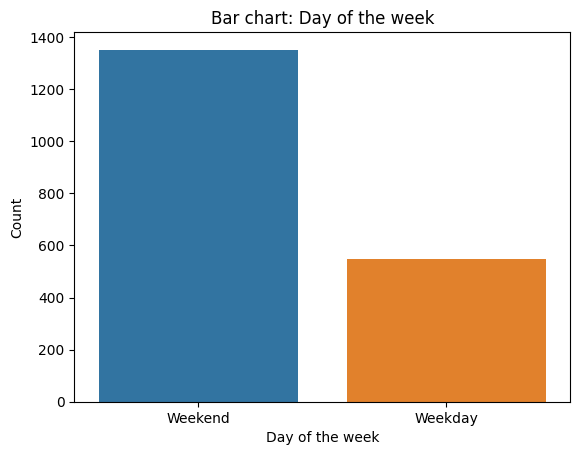

In [ ]:
# Creating countplot for the 'day_of_the_week' column with blue and orange colors
plt.title('Bar chart: Day of the week')
sns.countplot(data=df, x='day_of_the_week', hue='day_of_the_week',legend=False)
plt.xlabel('Day of the week')
plt.ylabel('Count');

Observations:

Most orders are delivered on the weekend.

Rating

In [ ]:
# Checking the unique values in the 'rating' column
rating_values_total = df['rating'].nunique()

# Displaying the total values in the 'rating' column
print ('There are', rating_values_total, 'rating values.')

There are 4 rating values.


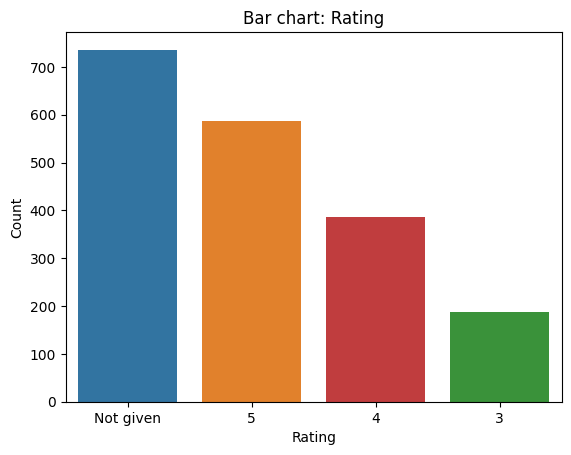

In [ ]:
# Getting the ratings ordered by frequency
ordered_ratings = df['rating'].value_counts().index

# Creating a countplot for 'rating' column
plt.title ('Bar chart: Rating')
sns.countplot (data=df, x='rating', order=ordered_ratings, hue='rating', legend=False)
plt.xlabel ('Rating')
plt.ylabel ('Count');

Observation:

There is a signifant number of non-rated orders, while a rating of 5 is predominant among the rated orders.

Food preparation time

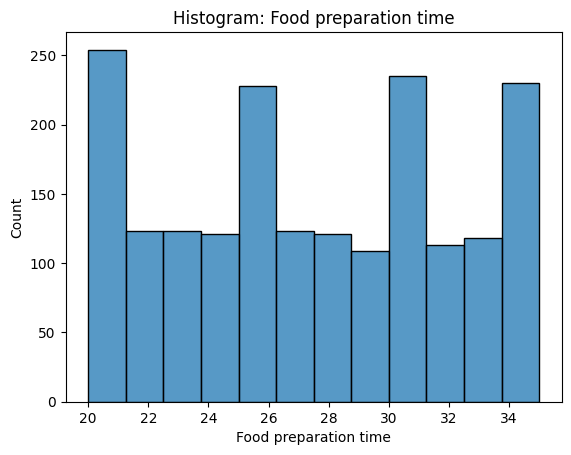

In [ ]:
# Creating a histogram for food preparation time
plt.title ('Histogram: Food preparation time')
plt.xlabel ('Food preparation time')
plt.ylabel ('Count')
sns.histplot (data=df, x='food_preparation_time');

Observations:

The data for food preparation time is not normally distributed and has a multimodal shape with 4 modes or clusters.

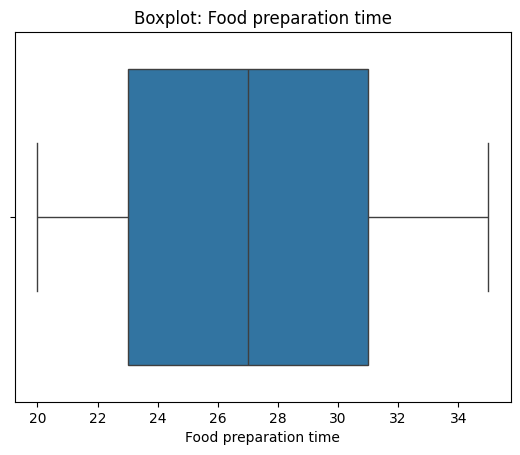

In [ ]:
# Creating a boxplot for food preparation time
plt.title ('Boxplot: Food preparation time')
sns.boxplot (data=df, x='food_preparation_time')
plt.xlabel ('Food preparation time');

Observations:

In 75% of the observations, food preparation time is less than or equal to 31 minutes. The median for food preparation time is 27 minutes. The boxplot shape is not sufficient to fully understand the distribution of the data in this case, while the histogram reflects its multimodal shape.

Delivery time

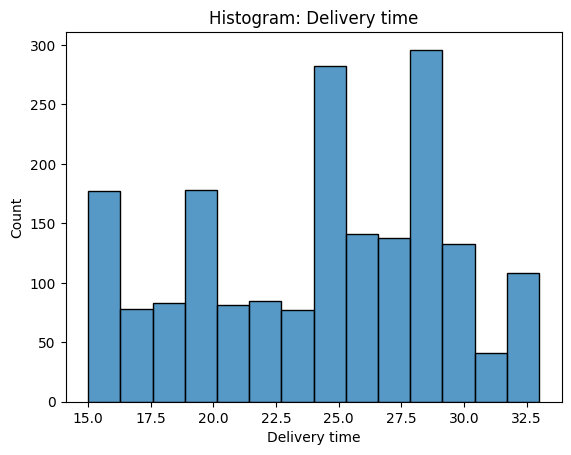

In [ ]:
# Creating a histogram for delivery time
plt.title ('Histogram: Delivery time')
plt.xlabel ('Delivery time')
plt.ylabel ('Count')
sns.histplot (data=df, x='delivery_time');

Observations:

The delivery time is not normally distributed and has a multimodal shape with 5 modes or clusters. This could reflect issues regarding data collection or delivery-related patterns, and requires further investigation.

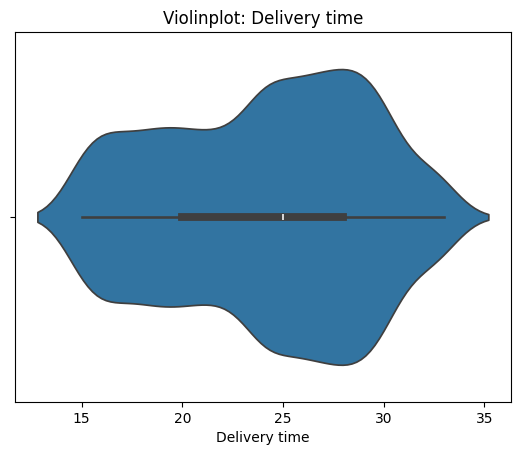

In [ ]:
# Creating a violinplot for delivery time
plt.title ('Violinplot: Delivery time')
sns.violinplot (data=df, x='delivery_time')
plt.xlabel ('Delivery time');

Observations:

The delivery time has a median of 25 minutes. In 75% of the observations, the delivery time is less than or equal to 28 minutes. The density distribution reflects the probability of the observations, with higher probabilities between 25 and 28 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Grouping by 'restaurant_name' and counting the number of orders for each restaurant
restaurant_order_counts = df['restaurant_name'].value_counts()

# Getting the top 5 restaurants with the most orders
top_5_restaurants = restaurant_order_counts.head()

# Displaying the top 5 restaurants
print('Top 5 Restaurants by Number of Orders:')
print(top_5_restaurants)

Top 5 Restaurants by Number of Orders:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:

There is relative concentration of orders in the top three restaurants, particulary in the top one, Shake Shack.


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Filtering weekend orders
df_weekend = df[df['day_of_the_week'] == 'Weekend']

# Identifying the most popular cuisine type in the weekend
most_popular_cuisine_weekend = df_weekend['cuisine_type'].value_counts().head (1)

# Displaying the most popular cuisine in the weekend
print('Most popular cuisine in the weekend and value count:')
print (most_popular_cuisine_weekend)

Most popular cuisine in the weekend and value count:
cuisine_type
American    415
Name: count, dtype: int64


Observations:

American cuisine is the most popular on weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Calculating the number of orders over 20 dollars
orders_over_20 = (df['cost_of_the_order'] > 20).sum()

# Displaying the number of orders over 20 dollars
print('The number of total orders that cost above 20 dollars is:', orders_over_20)

# Calculating the percentage represented by orders over 20 dollars
percentage_orders_over_20 = (orders_over_20 / len (df)) * 100

# Displaying the percentage represented by orders over 20 dollars
print ('Percentage of orders above 20 dollars:', round(percentage_orders_over_20, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:

Approximately 29.24 percent of the orders have a cost exceeding 20 dollars.


### **Question 10**: What is the mean order delivery time?

In [ ]:
# Calculating the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

# Displaying the mean delivery time
print('The mean order delivery time is', round(mean_delivery_time, 2), 'minutes')

The mean order delivery time is 24.16 minutes


#### Observations:

Orders take 24.16 minutes on average to be delivered.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# Getting the counts of each customer_id
top_3_customers_counts = df['customer_id'].value_counts().head(3)

# Displaying the customer IDs and the number of orders placed by the top 3 customers
print ('Customer ID and Number of Orders Placed by Top 3 Customers:')
print (top_3_customers_counts)

Customer ID and Number of Orders Placed by Top 3 Customers:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:

The top three customers placed about ten orders, with the top customer placing 13 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (Explore relations between numerical variables as well as relations between numerical and categorical variables)


Cost of the order by cuisine type

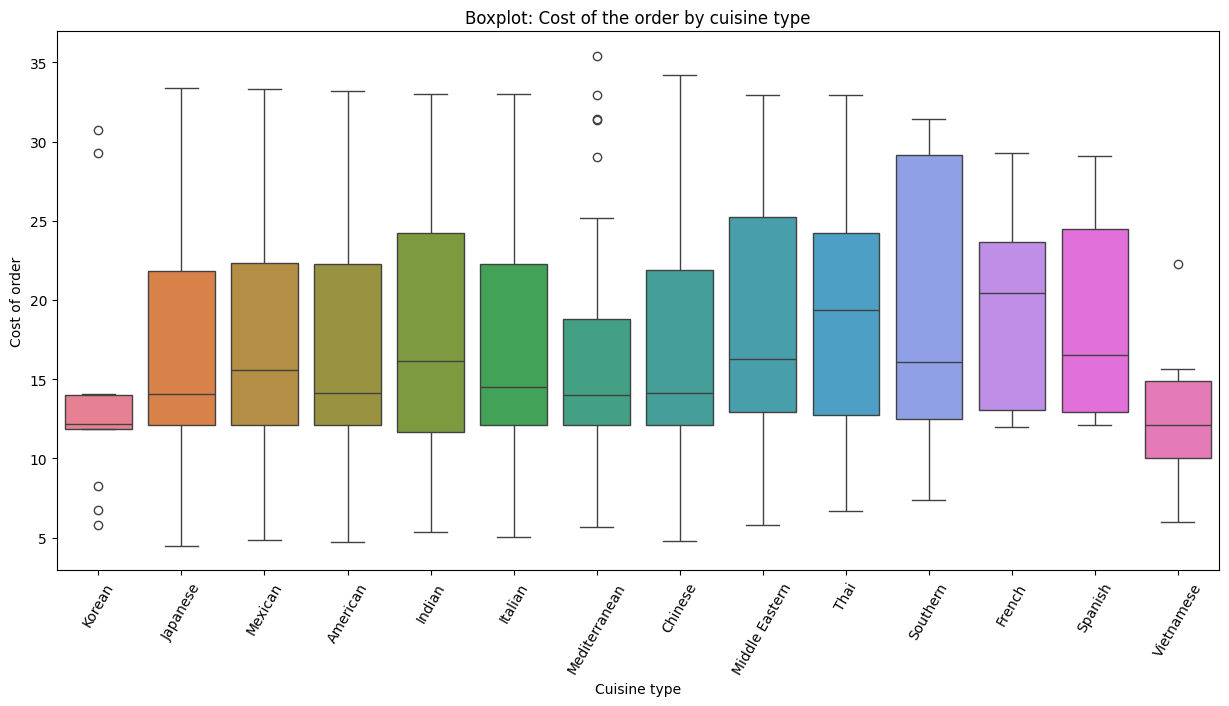

In [ ]:
# Creating a boxplot for cost of the order by cuisine type
plt.figure (figsize=(15,7))
plt.title ('Boxplot: Cost of the order by cuisine type')
plt.xticks (rotation=60)
sns.boxplot (data=df, x='cuisine_type', y='cost_of_the_order', hue='cuisine_type', legend=False)
plt.xlabel ('Cuisine type')
plt.ylabel ('Cost of order');

Observations:

American cuisine has a median order cost of 14 dollars, with 75% of the orders below or equal to 22 dollars. The cost distribution for American cuisine ranges from a minimum of 5 dollars to a maximum of 33 dollars. Japanese, Italian, and Chinese cuisines exhibit a similar cost range to American cuisine. In contrast, French cuisine tends to have a higher median cost of 20 dollars, while Vietnamese cuisine has a lower median cost of 12 dollars. Meditarranean cuisine has several high-cost outliers.

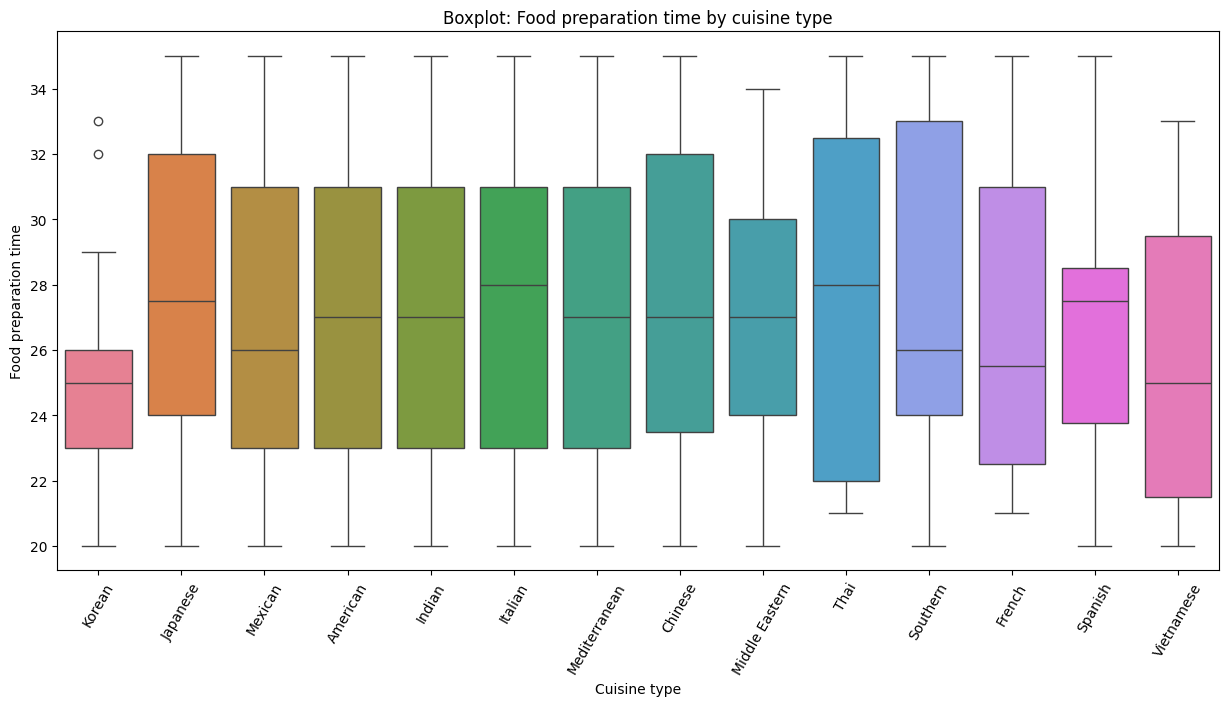

In [ ]:
# Creating a boxplot for food preparation time by cuisine type
plt.figure (figsize=(15,7))
plt.title ('Boxplot: Food preparation time by cuisine type')
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time',hue='cuisine_type', legend=False)
plt.xticks(rotation=60)
plt.xlabel ('Cuisine type')
plt.ylabel ('Food preparation time');

Observations:

In most cuisine types, preparation time has a range between 20 minutes and 35 minutes. Korean cuisine has a low interquartile range between 23 and 26 minutes, while Thai cuisine has a wider interquartile range between 22 and 32 minutes.

Delivery time by day of the week

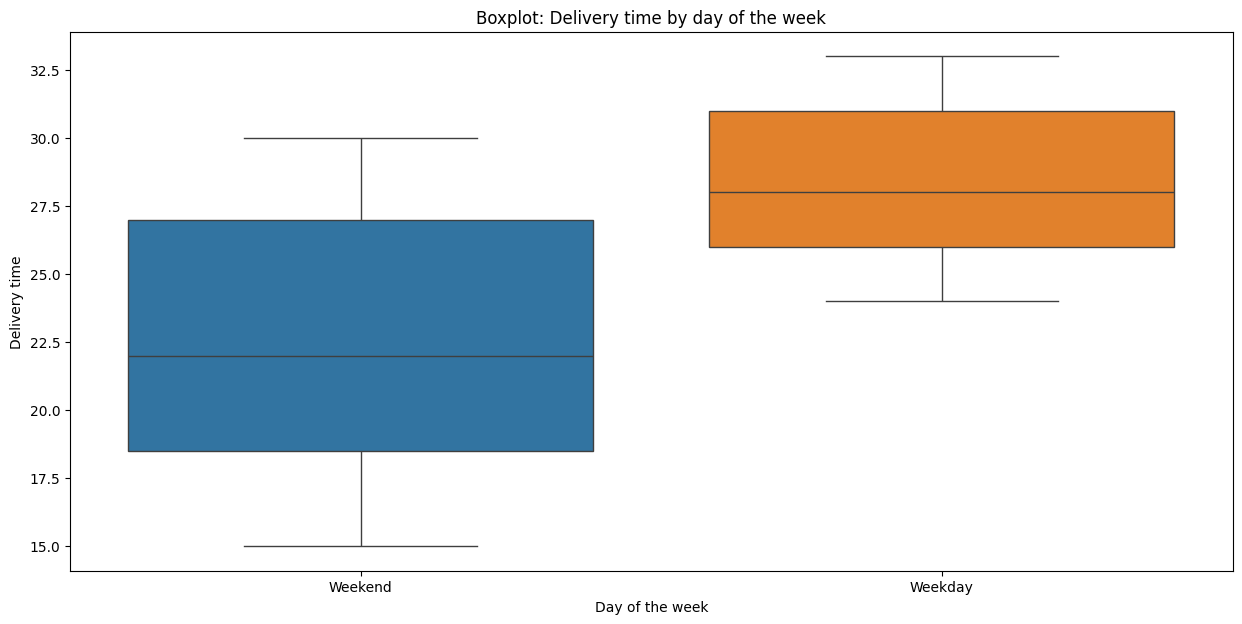

In [ ]:
# Creating a boxplot for delivery time by day of the week
plt.figure (figsize=(15,7))
plt.title ('Boxplot: Delivery time by day of the week')
sns.boxplot (data=df, x='day_of_the_week', y='delivery_time', hue='day_of_the_week',legend=False)
plt.xlabel ('Day of the week')
plt.ylabel ('Delivery time');

Observations:

Food delivery times on weekdays have a median of 28 minutes, while weekends are more efficient with a median delivery time of 22 minutes. This difference could be attributed to factors such as higher weekend order volumes and economies of scale, traffic patterns, and staffing levels, among others.

Food preparation time by day of the week

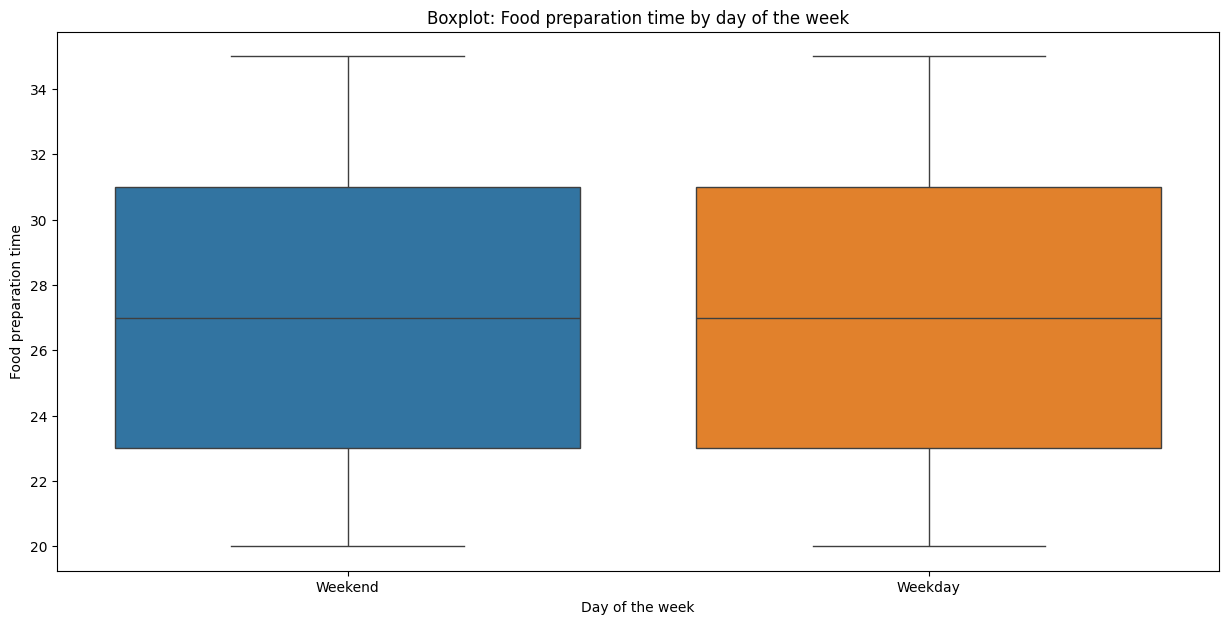

In [ ]:
# Creating a boxplot for delivery time by day of the week
plt.figure (figsize=(15,7))
plt.title ('Boxplot: Food preparation time by day of the week')
sns.boxplot (data=df, x='day_of_the_week', y='food_preparation_time', hue='day_of_the_week',legend=False)
plt.xlabel ('Day of the week')
plt.ylabel ('Food preparation time');

Observations:

Food preparation time remains consistent across weekdays and the weekend. This suggests that total delivery time remains slower on weekdays mainly due to slower delivery time and not food preparation time.

Total delivery time

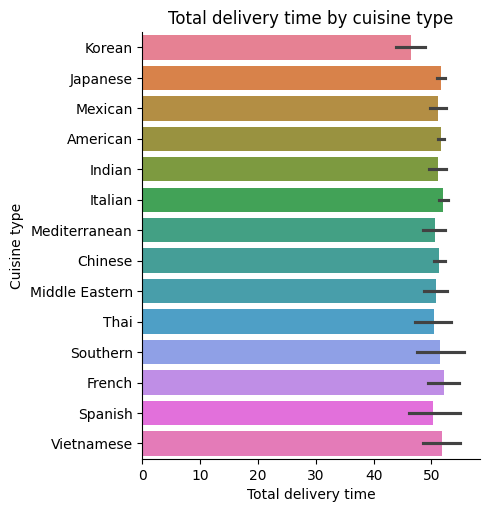

In [ ]:
# Creating a total delivery time column
df['total_delivery_time'] = df['food_preparation_time'] + df ['delivery_time']

# Displaying total delivery time by cuisine type
sns.catplot (data=df, x='total_delivery_time', y='cuisine_type', kind='bar', hue='cuisine_type',legend=False)
plt.title('Total delivery time by cuisine type')
plt.xlabel('Total delivery time')
plt.ylabel('Cuisine type');

Observations:

All cuisine types take close to 50 minutes of total delivery time, including the American, Japanese, Italian and Chinese cuisine. Korean cuisine takes the least time with a total delivery time of about 45 minutes, while the Vietnamese cuisine takes more than 50 minutes.

In [ ]:
# Displaying the first five rows of the data
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


Rating

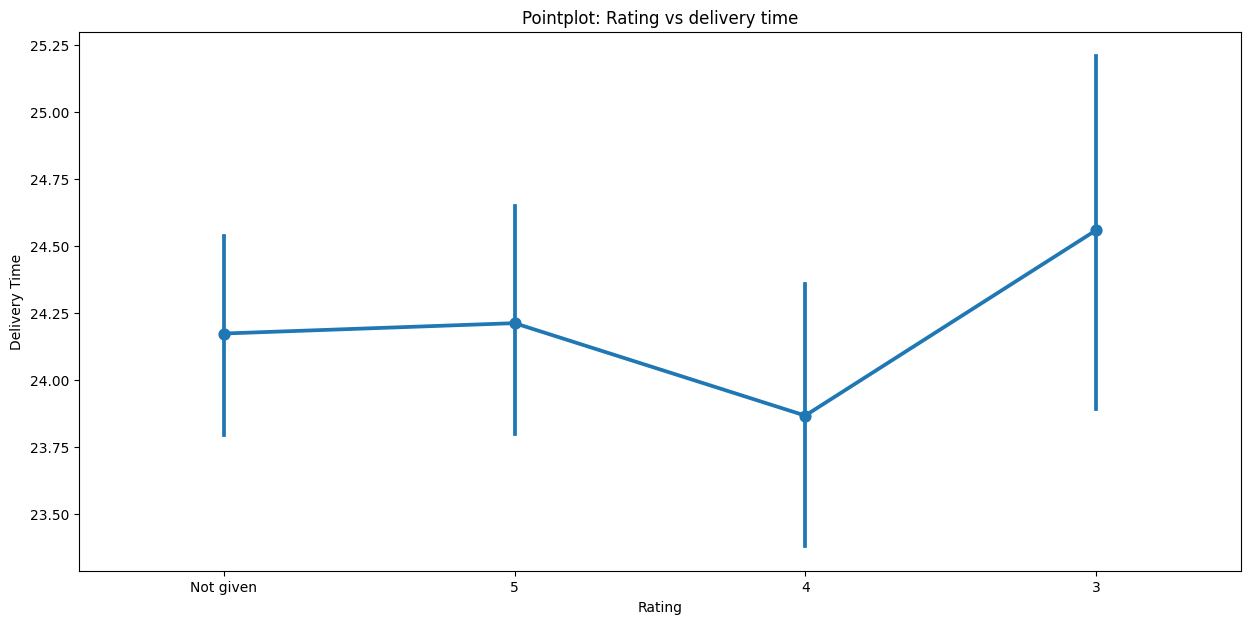

In [ ]:
# Getting the ratings ordered by frequency
ordered_rating = df['rating'].value_counts().index

# Creating a pointplot for rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x='rating', y='delivery_time', order=ordered_rating)
plt.title('Pointplot: Rating vs delivery time')
plt.xlabel('Rating')
plt.ylabel('Delivery Time');

Observations:

A longer delivery time seems to negatively affect the rating over a certain treshold of time, although no strong conclusions can be driven from this information alone.

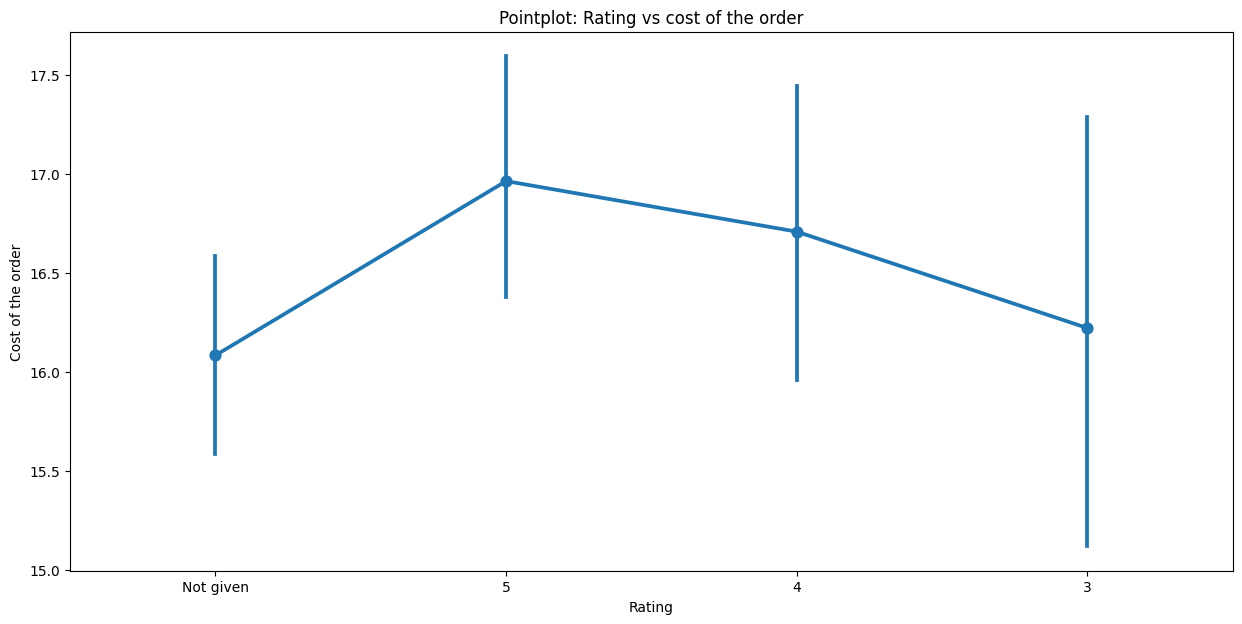

In [ ]:
# Getting the ratings ordered by frequency
ordered_rating = df['rating'].value_counts().index

# Creating a pointplot for rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x='rating', y='cost_of_the_order', order=ordered_rating)
plt.title('Pointplot: Rating vs cost of the order')
plt.xlabel('Rating')
plt.ylabel('Cost of the order');

Observations:

There is a positive correlation between the cost of the order and a higher rating. This suggest that higher price could be related to better food quality or a different client cluster.

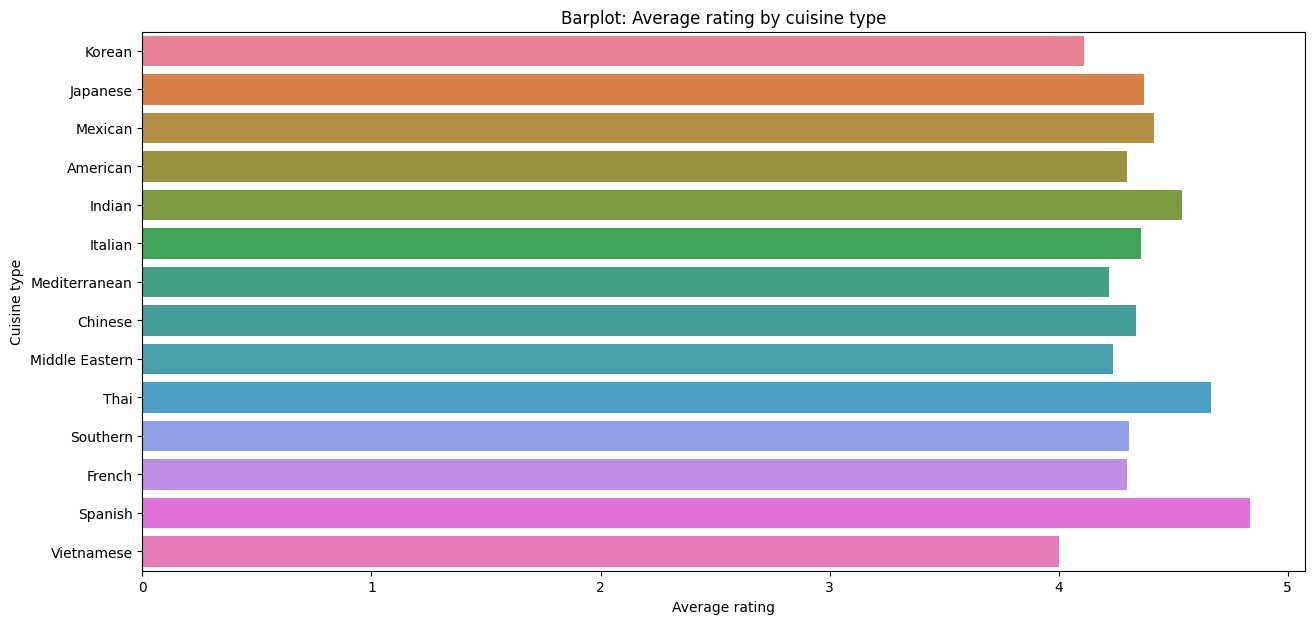

In [ ]:
# Creating a numeric rating column
df['rating_numeric'] = df['rating'].apply(lambda x: int(x) if x.isdigit() else np.nan)

# Grouping by 'cuisine_type' and calculating the mean rating for each group
average_rating_by_cuisine = df.groupby('cuisine_type')['rating_numeric'].transform('mean')

# Creating an 'average_cuisine_rating' column with the average rating for each cuisine type
df['average_cuisine_rating'] = average_rating_by_cuisine

# Creating a bar plot to display average ratings by cuisine type
plt.figure (figsize = (15, 7))
sns.barplot(data=df, x='average_cuisine_rating', y='cuisine_type', hue='cuisine_type',legend=False)
plt.title('Barplot: Average rating by cuisine type')
plt.xlabel('Average rating')
plt.ylabel('Cuisine type');

Observations:

Spanish cuisine has the highest average rating, followed by Thai cuisine and Indian cuisine. Most cuisine types have a high rating average of 4 or more. American, Japanese, Italian and Chinese cuisine all boast average ratings of approximately 4.5.

In [ ]:
# Displaying the first five rows of the data
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time,rating_numeric,average_cuisine_rating
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45,NaN,4.111111
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48,NaN,4.373626
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51,5.0,4.416667
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40,3.0,4.298913
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49,4.0,4.298913


Correlation analysis

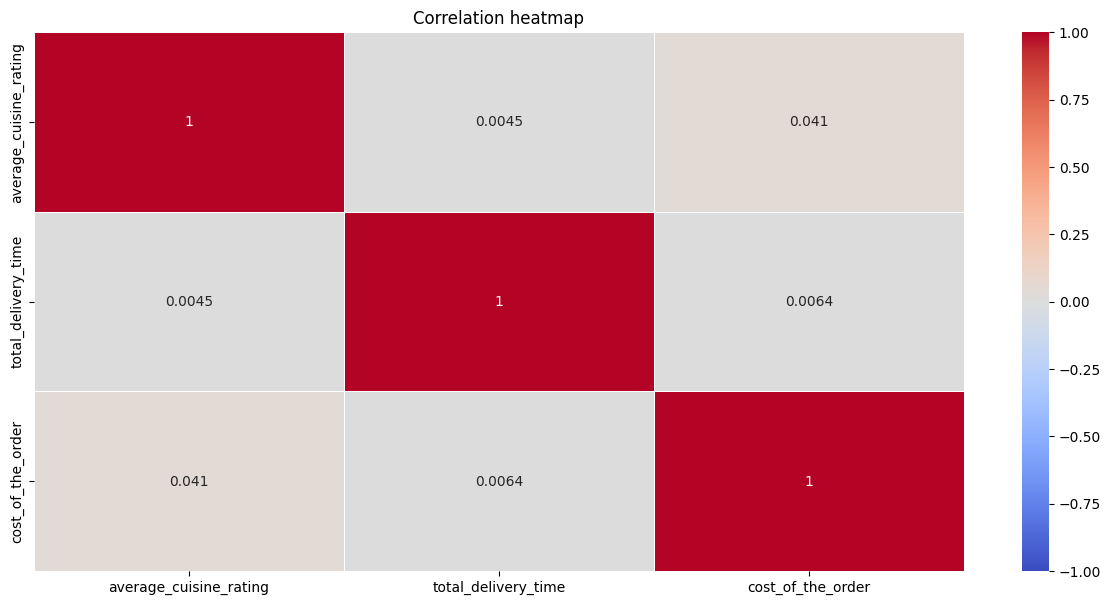

In [ ]:
# Selecting columns of interest in a heatmap
selected_columns = ['average_cuisine_rating', 'total_delivery_time','cost_of_the_order']

# Calculating correlation matrix
correlation_matrix = df [selected_columns].corr()

# Creating a heatmap
plt.figure (figsize=(15, 7))
sns.heatmap (correlation_matrix, annot=True, linewidths=.5,  vmin=-1, vmax=1, cmap='coolwarm')
plt.title ('Correlation heatmap');

Observations:

There is a positive correlation between average cuisine rating and total delivery time, as well as between average cuisine rating and cost of the order. However, the correlation is low, suggesting that other variables such as restaurant name may have relative weight in ratings.

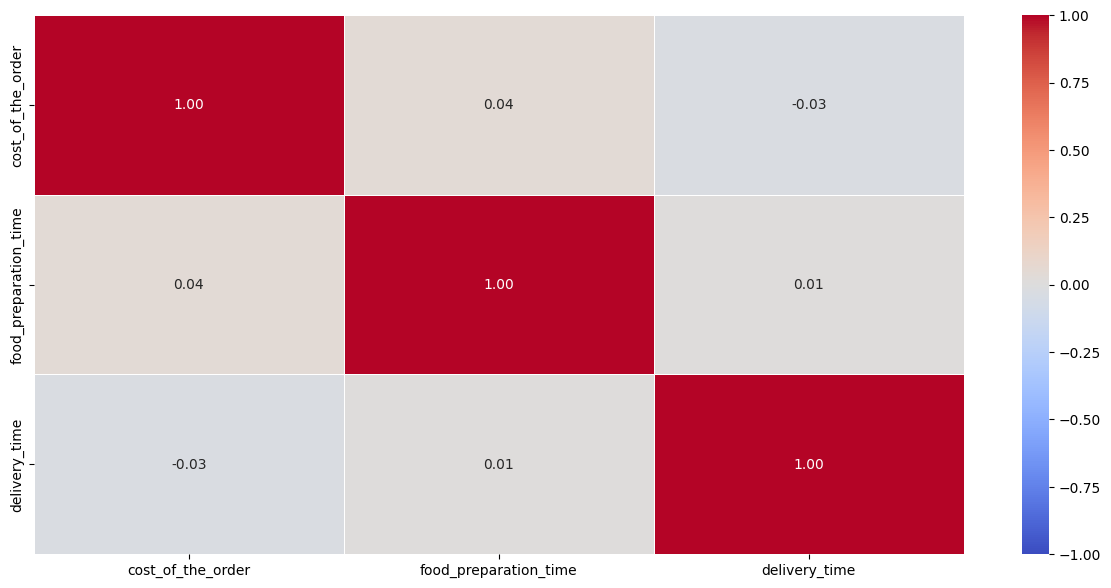

In [ ]:
# Selecting columns of interest in second heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

# Creating second heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", linewidths =.5, cmap="coolwarm");

Observations:

There is a positive correlation between cost of the order and food preparation time, which could reflect costly orders requiring more prepation time due to more complex orders or higher quality cuisine. There is a negative correlation between cost of the order and delivery time, which could reflect costly orders having shorter delivery time. Both correlations are low.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Filtering rated restaurants
df_rated = df [df['rating'] != 'Not given'].copy()

# Grouping by 'restaurant_name' and counting the number of valid ratings
rating_counts = df_rated.groupby('restaurant_name')['rating'].count()

# Grouping by 'restaurant_name' and calculating the mean of 'rating_numeric' for each restaurant
average_ratings = df_rated.groupby('restaurant_name')['rating_numeric'].mean()

# Filtering restaurants with over 50 rating counts and average rating over 4
selected_restaurants = rating_counts[(rating_counts > 50) & (average_ratings > 4)]

# Displaying the restaurants with over 50 rating counts and average rating over 4
print ('High rated restaurants and rating value counts:')
print ('')
print (selected_restaurants)

High rated restaurants and rating value counts:

restaurant_name
Blue Ribbon Fried Chicken     64
Blue Ribbon Sushi             73
Shake Shack                  133
The Meatball Shop             84
Name: rating, dtype: int64


Observations:

Four restaurants meet the specified criteria. Shake Shack has the highest number of rating count.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# Defining a function to calculate the revenue based on the order cost
def calculate_revenue (cost):
    if cost > 20:
        return cost * 0.25  # 25% charge for orders above 20 dollars
    elif cost > 5:
        return cost * 0.15  # 15% charge for orders above 5 dollars
    else:
        return 0  # No charge for orders below 5 dollars

# Creating a new column and applying the function to calculate the revenues for each order
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

# Calculating the total revenue earned by summing up the charges for all orders
total_revenue = df['revenue'].sum()

# Printing the total revenue
print('Total revenue earned by the company:', round(total_revenue, 1), 'dollars.')

Total revenue earned by the company: 6166.3 dollars.


#### Observations:

The total revenue earned by the company is 6166.3 dollars.

In [ ]:
# Displaying the first five rows of the data
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time,rating_numeric,average_cuisine_rating,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45,NaN,4.111111,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48,NaN,4.373626,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51,5.0,4.416667,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40,3.0,4.298913,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49,4.0,4.298913,1.7385


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# Calculating the percentage of orders with delivery times greater than 60 minutes
percentage_orders_over_60 = (df['total_delivery_time'] > 60).sum() / len(df) * 100

# Displaying the result
print(round(percentage_orders_over_60, 2), '% of orders take more than 60 minutes to be delivered.', sep='')

10.54% of orders take more than 60 minutes to be delivered.


#### Observations:

Only 10.5 percent of the orders take more than 60 minutes to be delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Filtering weekend orders
weekend_orders = df.loc [df ['day_of_the_week'] == 'Weekend']

# Calculating the mean delivery time for weekend orders
mean_delivery_time_weekend = weekend_orders['delivery_time'].mean()

# Diplaying the mean delivery time for weekend orders
print('The mean delivery time for weekend orders is:', round(mean_delivery_time_weekend), 'minutes')

# Filtering weekday orders
weekday_orders = df.loc [df ['day_of_the_week'] == 'Weekday']

# Calculating the mean delivery time for weekday orders
mean_delivery_time_weekday = weekday_orders['delivery_time'].mean()

# Displaying the mean delivery time for weekday orders
print('The mean delivery time for weekday orders is:', round(mean_delivery_time_weekday), 'minutes')

The mean delivery time for weekend orders is: 22 minutes
The mean delivery time for weekday orders is: 28 minutes


Observations:

The mean delivery time on weekdays is 28 minutes, while the mean delivery time on the weekend is 22 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

### Conclusions:
*  Cuisine Type Popularity: The most popular cuisine types among customers are American, Japanese, Italian, and Chinese. This suggests that the company should focus on partnering with restaurants offering these cuisines and expanding its network.

* Delivery Time Efficiency: The data shows that deliveries on weekends tend to be faster than on weekdays. This can be an opportunity for the company to encourage more customers to place orders on weekdays by offering promotions or discounts during those times. Delivery time beyond a certain treshold may negatively affect ratings, thus focusing on creating efficienies should remain a priority.

* Ratings: The presence of a significant number of ratings falling into the 'Not given' category indicates that customers may not always leave ratings when ordering. The company should consider implementing a more user-friendly rating system or incentivizing customers to provide feedback. Focusing on cuisine type niches with high ratings should be a strategy to develop new markets.



### Recommendations:

*  Cuisine Expansion: Encourage and actively seek partnerships with restaurants specializing in American, Japanese, Italian, and Chinese cuisines to offer a wider variety of options to customers.

* Promotions: Implement promotions or discounts during weekdays to incentivize customers to order more frequently during these times. This can help balance the delivery demand across the week.

* Rating System Enhancement: Improve the rating system to make it more user-friendly and prominent in the ordering process. Consider offering rewards or discounts to customers who consistently provide feedback.

* Market Niches: The company should focus part of its efforts on cuisine types that consistently receive high ratings. It should consider expanding marketing efforts and services to target these cuisine niches in order to develop new markets. Some cuisine types with high ratings include the Spanish, Thai, and Indian cuisines.

* Quality Control: Work closely with partner restaurants to ensure the quality of food and delivery services.Consistently high-quality service can lead to better ratings and customer loyalty.

* Market Insights: Continuously analyze customer behavior and preferences to tailor marketing efforts and promotions. Consider segmenting customers based on cuisine preferences and ordering habits.

* Data Collection: Ensure that rating data is collected accurately and consistently. Address any missing or inconsistent data to maintain data quality.

* Delivery Optimization: Explore ways to optimize the delivery process further. This might involve technology investments, route planning, or partnerships with third-party delivery services.